# Import Library

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time

# Dataset

In [2]:
# Read dataset
url = 'https://drive.google.com/file/d/1eQID8D1Ku2wq_h4QR2-WUkqiFAFBj5RN/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df_bank = pd.read_csv(url, delimiter = ';')
df_bank.sample(8)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6876,29,technician,single,secondary,no,22008,yes,no,unknown,28,may,139,2,-1,0,unknown,no
42419,73,retired,divorced,primary,no,5028,no,no,cellular,4,dec,696,10,-1,0,unknown,yes
32259,38,services,divorced,secondary,no,904,yes,no,cellular,16,apr,361,1,339,1,failure,no
35525,37,unemployed,single,secondary,no,490,yes,yes,cellular,7,may,739,2,325,3,failure,no
40951,32,technician,single,tertiary,no,696,no,yes,cellular,13,aug,101,4,105,4,failure,no
1617,56,technician,single,primary,no,230,yes,no,unknown,9,may,122,4,-1,0,unknown,no
16231,42,management,married,tertiary,no,176,yes,no,cellular,23,jul,123,1,-1,0,unknown,no
35116,30,blue-collar,married,secondary,no,-71,yes,no,cellular,6,may,165,2,-1,0,unknown,no


In [ ]:
# Split kolom numerikal dan kolom kategorikal
num_col = df_bank.select_dtypes('number').columns.tolist()
cat_col = df_bank.select_dtypes('object').columns.tolist()
print(num_col)
print(cat_col)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


# Pre-Processing

Skenario:
*   Pengelompokan kolom `month` menjadi kolom `kuartal`
*   Melakukan skaling untuk kolom numerikal dengan standardisasi
*   Melakukan label encoding untuk kolom `education`, `default`, `housing`, `loan`, dan `y`
*   Melakukan OHE untuk kolom `job`, `marital`, `poutcome`, `contact`, dan `kuartal`
*   Melakukan handling imbalance dengan undersampling, oversampling, dan SMOTE



In [ ]:
# Grouping kolom month
df_bank_std = df_bank.copy()

df_bank_std['kuartal'] = np.where(df_bank_std.month.isin(['jan', 'feb', 'mar']) == True, 'Q1',
                                   np.where(df_bank_std.month.isin(['apr', 'may', 'jun']) == True, 'Q2',
                                            np.where(df_bank_std.month.isin(['jul', 'aug', 'sep']) == True, 'Q3', 'Q4')))
df_bank_std.sample(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,kuartal
23891,34,technician,married,secondary,yes,91,no,no,cellular,29,aug,67,4,-1,0,unknown,no,Q3
366,38,admin.,divorced,secondary,no,308,yes,no,unknown,6,may,102,1,-1,0,unknown,no,Q2
33679,58,management,married,secondary,no,1112,yes,no,telephone,20,apr,21,3,-1,0,unknown,no,Q2
29370,27,student,single,unknown,no,1444,no,no,cellular,2,feb,248,2,-1,0,unknown,no,Q1
28452,31,blue-collar,married,secondary,no,326,no,yes,cellular,29,jan,124,1,-1,0,unknown,no,Q1
3099,43,blue-collar,married,secondary,no,15740,yes,no,unknown,14,may,252,2,-1,0,unknown,no,Q2
28004,46,services,divorced,secondary,no,755,no,no,cellular,28,jan,246,1,-1,0,unknown,no,Q1


In [ ]:
# Standardisasi kolom numerikal
from sklearn.preprocessing import StandardScaler

for i in range(0, len(num_col)):
  df_bank_std[str(num_col[i]) + '_std'] = StandardScaler().fit_transform(df_bank_std[num_col[i]].values.reshape(len(df_bank_std), 1))
  df_bank_std = df_bank_std.drop(columns = num_col[i])

df_bank_std.sample(7)

,job,marital,education,default,housing,loan,contact,month,poutcome,y,kuartal,age_std,balance_std,day_std,duration_std,campaign_std,pdays_std,previous_std
13213,management,single,tertiary,no,yes,no,cellular,jul,unknown,no,Q3,-0.747384,-0.447419,-0.938003,0.760458,-0.569351,-0.411453,-0.251940
1544,unemployed,single,secondary,no,no,no,unknown,may,unknown,no,Q2,-0.747384,-0.389286,-0.938003,-0.711244,0.399020,-0.411453,-0.251940
9270,technician,married,tertiary,no,no,no,unknown,jun,unknown,no,Q2,0.100181,-0.056909,-1.298476,0.251769,0.076230,-0.411453,-0.251940
25151,management,married,tertiary,no,yes,yes,cellular,nov,failure,no,Q4,-0.841558,0.573032,0.263576,-0.361763,-0.246560,0.757055,0.182198
10776,retired,married,secondary,no,no,no,unknown,jun,unknown,no,Q2,1.324443,-0.294368,0.143418,0.111977,0.399020,-0.411453,-0.251940
34488,blue-collar,single,secondary,no,yes,no,cellular,may,unknown,no,Q2,0.006007,-0.271049,-1.298476,-0.097711,-0.569351,-0.411453,-0.251940
13391,admin.,single,secondary,no,no,no,cellular,jul,unknown,no,Q3,-0.370689,-0.117998,-0.817845,0.003250,0.076230,-0.411453,-0.251940


In [ ]:
# Label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

encoding = ['education', 'default', 'housing', 'loan', 'y']

for cols in encoding:
    df_bank_std[cols] = label_encoder.fit_transform(df_bank_std[cols])

df_bank_std.sample(8)

,job,marital,education,default,housing,loan,contact,month,poutcome,y,kuartal,age_std,balance_std,day_std,duration_std,campaign_std,pdays_std,previous_std
42011,housemaid,married,0,0,0,0,cellular,oct,failure,0,Q4,1.795313,-0.387644,1.344997,-0.680179,-0.246560,0.357565,1.050473
15911,admin.,married,1,0,1,0,cellular,jul,unknown,0,Q3,-1.029906,-0.160366,0.744208,-0.641348,-0.246560,-0.411453,-0.251940
35433,entrepreneur,single,2,0,1,0,cellular,may,other,0,Q2,-0.935732,-0.206347,-1.058161,0.143042,-0.569351,1.276393,1.484611
20741,technician,married,1,0,0,0,cellular,aug,unknown,0,Q3,0.759399,0.666636,-0.337213,0.053730,-0.246560,-0.411453,-0.251940
10684,admin.,married,1,0,0,0,unknown,jun,unknown,0,Q2,0.288529,0.109608,0.023260,-0.462724,0.076230,-0.411453,-0.251940
29158,retired,married,0,0,0,0,telephone,feb,unknown,0,Q1,3.961314,-0.307834,-1.658950,2.538926,-0.569351,-0.411453,-0.251940
6112,retired,single,1,0,1,0,unknown,may,unknown,1,Q2,1.701139,-0.332138,1.344997,3.125277,0.721811,-0.411453,-0.251940
27247,admin.,married,0,0,0,0,cellular,nov,unknown,0,Q4,1.324443,-0.342648,0.624050,-0.520971,0.076230,-0.411453,-0.251940


In [ ]:
# OHE
# WARNING: run code ini sekali saja
for cat in ['job', 'marital', 'poutcome', 'contact', 'kuartal']:
    onehots = pd.get_dummies(df_bank_std[cat], prefix=cat)
    df_bank_std = df_bank_std.join(onehots)

df_bank_std.sample(7)

,job,marital,education,default,housing,loan,contact,month,poutcome,y,...,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown,kuartal_Q1,kuartal_Q2,kuartal_Q3,kuartal_Q4
34540,entrepreneur,single,1,0,1,1,cellular,may,unknown,0,...,0,0,1,1,0,0,0,1,0,0
37917,technician,single,1,0,1,1,cellular,may,unknown,0,...,0,0,1,1,0,0,0,1,0,0
20513,management,married,2,0,0,0,cellular,aug,unknown,0,...,0,0,1,1,0,0,0,0,1,0
40177,management,divorced,2,0,0,1,cellular,jun,unknown,1,...,0,0,1,1,0,0,0,1,0,0
11712,unemployed,married,1,0,1,0,unknown,jun,unknown,0,...,0,0,1,0,0,1,0,1,0,0
21079,blue-collar,married,3,0,0,0,cellular,aug,unknown,0,...,0,0,1,1,0,0,0,0,1,0
34615,services,single,1,0,1,0,cellular,may,failure,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
# Drop columns
df_bank_std = df_bank_std.drop(columns = ['job', 'marital', 'contact', 'poutcome', 'kuartal', 'month'])
df_bank_std.sample(7)

,education,default,housing,loan,y,age_std,balance_std,day_std,duration_std,campaign_std,...,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown,kuartal_Q1,kuartal_Q2,kuartal_Q3,kuartal_Q4
5522,1,0,1,0,0,-0.841558,-0.205690,0.864365,1.715705,0.076230,...,0,0,1,0,0,1,0,1,0,0
41166,1,0,1,1,0,-0.276515,-0.313746,0.383734,-0.656880,-0.569351,...,0,0,1,1,0,0,0,0,1,0
11856,2,0,1,1,0,0.571051,-0.436581,0.503892,-0.948114,7.177616,...,0,0,1,0,0,1,0,1,0,0
15624,2,0,1,0,0,-0.935732,1.421711,0.624050,0.383795,-0.569351,...,0,0,1,1,0,0,0,0,1,0
5071,2,0,1,0,0,-0.841558,0.003523,0.624050,0.838120,-0.246560,...,0,0,1,0,0,1,0,1,0,0
11331,0,0,0,0,0,-0.182341,-0.007315,0.263576,-0.563685,-0.246560,...,0,0,1,0,0,1,0,1,0,0
21404,0,0,0,1,0,0.382703,-0.431983,0.263576,-0.505439,0.399020,...,0,0,1,1,0,0,0,0,1,0


In [ ]:
# Pemisahan features vs target
x = df_bank_std.drop(columns=['y']) # menggunakan semua feature kecuali target
y = df_bank_std['y']
print(x.shape)
print(y.shape)

(45211, 37)
(45211,)


In [ ]:
# Handling class imbalance
from imblearn import under_sampling, over_sampling

x_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(x, y)
x_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(x, y)
x_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    39922
1     5289
Name: y, dtype: int64
UNDERSAMPLING
0    10578
1     5289
Name: y, dtype: int64
OVERSAMPLING
0    39922
1    19961
Name: y, dtype: int64
SMOTE
0    39922
1    19961
Name: y, dtype: int64


# Split Data Train & Test

In [ ]:
# Split data train & test
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 1/3, random_state = 50)
xtrain_under, xtest_under, ytrain_under, ytest_under = train_test_split(x_under, y_under, test_size = 1/3, random_state = 50)
xtrain_over, xtest_over, ytrain_over, ytest_over = train_test_split(x_over, y_over, test_size = 1/3, random_state = 50)
xtrain_over_SMOTE, xtest_over_SMOTE, ytrain_over_SMOTE, ytest_over_SMOTE = train_test_split(x_over_SMOTE, y_over_SMOTE, test_size = 1/3, random_state = 50)

# Def Model Evaluation

In [19]:
# Definition eval_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    ypred_train = model.predict(xtrain)
    print("Accuracy (Train Set): %.2f" % accuracy_score(ytrain, ypred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print('')
    print("Precision (Train Set): %.2f" % precision_score(ytrain, ypred_train))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print('')
    print("Recall (Train Set): %.2f" % recall_score(ytrain, ypred_train))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print('')
    print("F1-Score (Train Set): %.2f" % f1_score(ytrain, ypred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    print('')

    ypred_proba = model.predict_proba(xtest)
    ypred_train_proba = model.predict_proba(xtrain)
    print("AUC (Train Set): %.2f" % roc_auc_score(ytrain, ypred_train_proba[:, 1]))
    print("AUC (Test Set): %.2f" % roc_auc_score(ytest, ypred_proba[:, 1]))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

# Modeling Logistic Regression

In [ ]:
# Fitting Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_ori = lr.fit(xtrain, ytrain)
lr_under = lr.fit(xtrain_under, ytrain_under)
lr_over = lr.fit(xtrain_over, ytrain_over)
lr_smote = lr.fit(xtrain_over_SMOTE, ytrain_over_SMOTE)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# Logistic Regression Evaluation
print('Original')
eval_classification(lr_ori, xtrain, ytrain, xtest, ytest)

Original
Accuracy (Train Set): 0.89
Accuracy (Test Set): 0.89

Precision (Train Set): 0.55
Precision (Test Set): 0.54

Recall (Train Set): 0.51
Recall (Test Set): 0.51

F1-Score (Train Set): 0.53
F1-Score (Test Set): 0.53

AUC (Train Set): 0.89
AUC (Test Set): 0.88


In [ ]:
print('Under Sampling')
eval_classification(lr_under, xtrain_under, ytrain_under, xtest_under, ytest_under)

Under Sampling
Accuracy (Train Set): 0.80
Accuracy (Test Set): 0.80

Precision (Train Set): 0.82
Precision (Test Set): 0.83

Recall (Train Set): 0.51
Recall (Test Set): 0.51

F1-Score (Train Set): 0.63
F1-Score (Test Set): 0.64

AUC (Train Set): 0.88
AUC (Test Set): 0.89


In [ ]:
print('Over Sampling')
eval_classification(lr_over, xtrain_over, ytrain_over, xtest_over, ytest_over)

Over Sampling
Accuracy (Train Set): 0.80
Accuracy (Test Set): 0.80

Precision (Train Set): 0.82
Precision (Test Set): 0.82

Recall (Train Set): 0.52
Recall (Test Set): 0.51

F1-Score (Train Set): 0.63
F1-Score (Test Set): 0.63

AUC (Train Set): 0.89
AUC (Test Set): 0.88


In [ ]:
print('SMOTE')
eval_classification(lr_smote, xtrain_over_SMOTE, ytrain_over_SMOTE, xtest_over_SMOTE, ytest_over_SMOTE)

SMOTE
Accuracy (Train Set): 0.87
Accuracy (Test Set): 0.87

Precision (Train Set): 0.87
Precision (Test Set): 0.87

Recall (Train Set): 0.73
Recall (Test Set): 0.73

F1-Score (Train Set): 0.79
F1-Score (Test Set): 0.79

AUC (Train Set): 0.94
AUC (Test Set): 0.94


# Modeling Decision Tree

In [ ]:
# Fitting Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=50)
dt_ori = dt.fit(xtrain, ytrain)
dt_under = dt.fit(xtrain_under, ytrain_under)
dt_over = dt.fit(xtrain_over, ytrain_over)
dt_smote = dt.fit(xtrain_over_SMOTE, ytrain_over_SMOTE)

In [ ]:
# Decision Tree Evaluation
print('Original')
eval_classification(dt_ori, xtrain, ytrain, xtest, ytest)

Original
Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.94

Precision (Train Set): 0.84
Precision (Test Set): 0.70

Recall (Train Set): 0.89
Recall (Test Set): 0.82

F1-Score (Train Set): 0.87
F1-Score (Test Set): 0.76

AUC (Train Set): 0.93
AUC (Test Set): 0.89


In [ ]:
print('Under Sampling')
eval_classification(dt_under, xtrain_under, ytrain_under, xtest_under, ytest_under)

Under Sampling
Accuracy (Train Set): 0.94
Accuracy (Test Set): 0.94

Precision (Train Set): 0.94
Precision (Test Set): 0.94

Recall (Train Set): 0.87
Recall (Test Set): 0.88

F1-Score (Train Set): 0.90
F1-Score (Test Set): 0.91

AUC (Train Set): 0.92
AUC (Test Set): 0.92


In [ ]:
print('Over Sampling')
eval_classification(dt_over, xtrain_over, ytrain_over, xtest_over, ytest_over)

Over Sampling
Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.87

Precision (Train Set): 1.00
Precision (Test Set): 0.81

Recall (Train Set): 0.90
Recall (Test Set): 0.80

F1-Score (Train Set): 0.95
F1-Score (Test Set): 0.81

AUC (Train Set): 0.95
AUC (Test Set): 0.85


In [ ]:
print('SMOTE')
eval_classification(dt_smote, xtrain_over_SMOTE, ytrain_over_SMOTE, xtest_over_SMOTE, ytest_over_SMOTE)

SMOTE
Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.88

Precision (Train Set): 1.00
Precision (Test Set): 0.82

Recall (Train Set): 1.00
Recall (Test Set): 0.81

F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.81

AUC (Train Set): 1.00
AUC (Test Set): 0.86


# Modeling Random Forest

In [ ]:
# Fitting Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 50)
rf_ori = rf.fit(xtrain, ytrain)
rf_under = rf.fit(xtrain_under, ytrain_under)
rf_over = rf.fit(xtrain_over, ytrain_over)
rf_smote = rf.fit(xtrain_over_SMOTE, ytrain_over_SMOTE)

In [ ]:
# Random Forest Evaluation
print('Original')
eval_classification(rf_ori, xtrain, ytrain, xtest, ytest)

Original
Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.96

Precision (Train Set): 0.88
Precision (Test Set): 0.79

Recall (Train Set): 0.92
Recall (Test Set): 0.87

F1-Score (Train Set): 0.90
F1-Score (Test Set): 0.83

AUC (Train Set): 0.99
AUC (Test Set): 0.98


In [ ]:
print('Under Sampling')
eval_classification(rf_under, xtrain_under, ytrain_under, xtest_under, ytest_under)

Under Sampling
Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.96

Precision (Train Set): 0.95
Precision (Test Set): 0.96

Recall (Train Set): 0.90
Recall (Test Set): 0.92

F1-Score (Train Set): 0.92
F1-Score (Test Set): 0.94

AUC (Train Set): 0.99
AUC (Test Set): 0.99


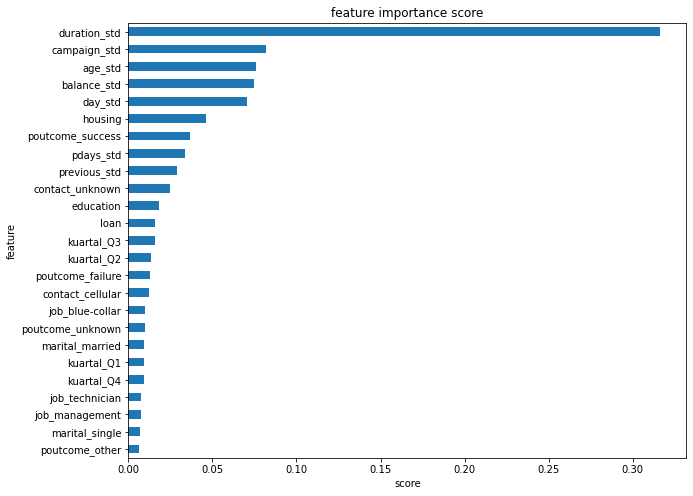

In [ ]:
show_feature_importance(rf_under)

In [ ]:
print('Over Sampling')
eval_classification(rf_over, xtrain_over, ytrain_over, xtest_over, ytest_over)

Over Sampling
Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.91

Precision (Train Set): 1.00
Precision (Test Set): 0.87

Recall (Train Set): 0.93
Recall (Test Set): 0.85

F1-Score (Train Set): 0.96
F1-Score (Test Set): 0.86

AUC (Train Set): 1.00
AUC (Test Set): 0.97


In [ ]:
print('SMOTE')
eval_classification(rf_smote, xtrain_over_SMOTE, ytrain_over_SMOTE, xtest_over_SMOTE, ytest_over_SMOTE)

SMOTE
Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.92

Precision (Train Set): 1.00
Precision (Test Set): 0.88

Recall (Train Set): 1.00
Recall (Test Set): 0.89

F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.89

AUC (Train Set): 1.00
AUC (Test Set): 0.98


# Modeling KNN

In [ ]:
# Fitting KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_ori = knn.fit(xtrain, ytrain)
knn_under = knn.fit(xtrain_under, ytrain_under)
knn_over = knn.fit(xtrain_over, ytrain_over)
knn_smote = knn.fit(xtrain_over_SMOTE, ytrain_over_SMOTE)

In [ ]:
# KNN Evaluation
print('Original')
eval_classification(knn_ori, xtrain, ytrain, xtest, ytest)

Original
Accuracy (Train Set): 0.91
Accuracy (Test Set): 0.90

Precision (Train Set): 0.56
Precision (Test Set): 0.53

Recall (Train Set): 0.90
Recall (Test Set): 0.88

F1-Score (Train Set): 0.69
F1-Score (Test Set): 0.66

AUC (Train Set): 0.96
AUC (Test Set): 0.95


In [ ]:
print('Under Sampling')
eval_classification(knn_under, xtrain_under, ytrain_under, xtest_under, ytest_under)

Under Sampling
Accuracy (Train Set): 0.90
Accuracy (Test Set): 0.90

Precision (Train Set): 0.82
Precision (Test Set): 0.83

Recall (Train Set): 0.89
Recall (Test Set): 0.90

F1-Score (Train Set): 0.85
F1-Score (Test Set): 0.86

AUC (Train Set): 0.96
AUC (Test Set): 0.96


In [ ]:
print('Over Sampling')
eval_classification(knn, xtrain_over, ytrain_over, xtest_over, ytest_over)

Over Sampling
Accuracy (Train Set): 0.91
Accuracy (Test Set): 0.88

Precision (Train Set): 0.84
Precision (Test Set): 0.79

Recall (Train Set): 0.90
Recall (Test Set): 0.88

F1-Score (Train Set): 0.86
F1-Score (Test Set): 0.83

AUC (Train Set): 0.97
AUC (Test Set): 0.94


In [ ]:
print('SMOTE')
eval_classification(knn, xtrain_over_SMOTE, ytrain_over_SMOTE, xtest_over_SMOTE, ytest_over_SMOTE)

SMOTE
Accuracy (Train Set): 0.93
Accuracy (Test Set): 0.90

Precision (Train Set): 0.85
Precision (Test Set): 0.80

Recall (Train Set): 0.96
Recall (Test Set): 0.92

F1-Score (Train Set): 0.90
F1-Score (Test Set): 0.86

AUC (Train Set): 0.99
AUC (Test Set): 0.95


# Modeling XGBoost

In [ ]:
# Fitting XGBoost
from xgboost import XGBClassifier

xg = XGBClassifier()
xg_ori = xg.fit(xtrain, ytrain)
xg_under = xg.fit(xtrain_under, ytrain_under)
xg_over = xg.fit(xtrain_over, ytrain_over)
xg_smote = xg.fit(xtrain_over_SMOTE, ytrain_over_SMOTE)

In [ ]:
# XGBoost Evaluation
print('Original')
eval_classification(xg_ori, xtrain, ytrain, xtest, ytest)

Original
Accuracy (Train Set): 0.89
Accuracy (Test Set): 0.89

Precision (Train Set): 0.53
Precision (Test Set): 0.51

Recall (Train Set): 0.67
Recall (Test Set): 0.66

F1-Score (Train Set): 0.59
F1-Score (Test Set): 0.58

AUC (Train Set): 0.92
AUC (Test Set): 0.91


In [ ]:
print('Under Sampling')
eval_classification(xg_under, xtrain_under, ytrain_under, xtest_under, ytest_under)

Under Sampling
Accuracy (Train Set): 0.84
Accuracy (Test Set): 0.83

Precision (Train Set): 0.81
Precision (Test Set): 0.81

Recall (Train Set): 0.67
Recall (Test Set): 0.66

F1-Score (Train Set): 0.73
F1-Score (Test Set): 0.73

AUC (Train Set): 0.92
AUC (Test Set): 0.92


In [ ]:
print('Over Sampling')
eval_classification(xg, xtrain_over, ytrain_over, xtest_over, ytest_over)

Over Sampling
Accuracy (Train Set): 0.84
Accuracy (Test Set): 0.83

Precision (Train Set): 0.81
Precision (Test Set): 0.80

Recall (Train Set): 0.67
Recall (Test Set): 0.66

F1-Score (Train Set): 0.73
F1-Score (Test Set): 0.73

AUC (Train Set): 0.92
AUC (Test Set): 0.91


In [ ]:
print('SMOTE')
eval_classification(xg, xtrain_over_SMOTE, ytrain_over_SMOTE, xtest_over_SMOTE, ytest_over_SMOTE)

SMOTE
Accuracy (Train Set): 0.89
Accuracy (Test Set): 0.89

Precision (Train Set): 0.84
Precision (Test Set): 0.84

Recall (Train Set): 0.83
Recall (Test Set): 0.83

F1-Score (Train Set): 0.84
F1-Score (Test Set): 0.83

AUC (Train Set): 0.96
AUC (Test Set): 0.96


# Model Selection

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

df_models = pd.DataFrame(columns=['model', 'run_time', 'auc', 'auc_cv'])

classifiers = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier()
}

for key in classifiers:

    print(key)

    start_time = time.time()

    classifier = classifiers[key]
    model = classifier.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    ypred_proba = model.predict_proba(xtest)

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'auc': roc_auc_score(ytest, ypred_proba[:, 1]),
           'auc_cv': scores.mean()
            }

    df_models = df_models.append(row, ignore_index=True)

LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


DecisionTreeClassifier
RandomForestClassifier
KNN


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


XGBClassifier


In [ ]:
df_models.head(20).sort_values(by='auc', ascending=False)

,model,run_time,auc,auc_cv
2,RandomForestClassifier,1.98,0.916641,0.976366
4,XGBClassifier,1.28,0.913049,0.955614
0,LogisticRegression,0.25,0.884914,0.942690
3,KNN,1.41,0.828343,0.952006
1,DecisionTreeClassifier,0.12,0.693701,0.857961


# Hyperparameter Tuning

## Random Forest

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define models and parameters
model = RandomForestClassifier()

def evaluate_model(model, x, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, x, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
	return scores

evaluate_model(model, xtrain, ytrain)

array([0.92097051, 0.92016786, 0.91896733, 0.9209314 , 0.93186934,
       0.91068092, 0.92499059, 0.93055626, 0.92453828, 0.91724263,
       0.92143392, 0.91377578, 0.91043151, 0.91978319, 0.93165534,
       0.92088068, 0.92039243, 0.92437659, 0.93288969, 0.92379535,
       0.92460433, 0.92714331, 0.91560616, 0.91302069, 0.92857951,
       0.91823655, 0.91529916, 0.91635015, 0.92875811, 0.9268865 ])

In [ ]:
# example of grid searching key hyperparameters for RandomForestClassifier
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define models and parameters
model = RandomForestClassifier()
hyperparams = dict(
                    n_estimators = [int(x) for x in np.linspace(10, 1000, num=100)],
                    criterion = ['gini', 'entropy'],
                    max_depth = [int(x) for x in np.linspace(1, 1000, num=50)],
                    min_samples_split = [int(x) for x in np.linspace(2, 40, num=40)],
                    min_samples_leaf = [int(x) for x in np.linspace(2, 20, num=20)],
                    max_features = ['auto', 'sqrt', 'log2']
                    )

# define grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=50)
rs = RandomizedSearchCV(model, hyperparams, cv=cv, random_state=50, scoring='roc_auc')
rs_result = rs.fit(xtrain, ytrain)

# summarize results
print("Best: %f using %s" % (rs_result.best_score_, rs_result.best_params_))

means = rs_result.cv_results_['mean_test_score']
stds = rs_result.cv_results_['std_test_score']
params = rs_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.926812 using {'n_estimators': 870, 'min_samples_split': 29, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 347, 'criterion': 'entropy'}
0.923423 (0.006241) with: {'n_estimators': 890, 'min_samples_split': 7, 'min_samples_leaf': 13, 'max_features': 'auto', 'max_depth': 877, 'criterion': 'gini'}
0.926311 (0.006153) with: {'n_estimators': 970, 'min_samples_split': 17, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 490, 'criterion': 'entropy'}
0.923198 (0.006219) with: {'n_estimators': 560, 'min_samples_split': 30, 'min_samples_leaf': 13, 'max_features': 'auto', 'max_depth': 551, 'criterion': 'gini'}
0.924832 (0.006135) with: {'n_estimators': 140, 'min_samples_split': 33, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 449, 'criterion': 'entropy'}
0.920906 (0.006481) with: {'n_estimators': 60, 'min_samples_split': 24, 'min_samples_leaf': 18, 'max_features': 'log2', 'max_depth': 959, 'criterion': 'entropy'}
0.924647 (0.006099) with: {'n_estimato

In [ ]:
# define models and parameters
model = RandomForestClassifier(n_estimators = 870,
                    criterion = 'entropy',
                    max_depth = 347,
                    min_samples_split = 29,
                    min_samples_leaf = 2,
                    max_features = 'sqrt',
                    random_state = 50)

model_ori = model.fit(xtrain, ytrain)
model_under = model.fit(xtrain_under, ytrain_under)
model_over = model.fit(xtrain_over, ytrain_over)
model_smote = model.fit(xtrain_over_SMOTE, ytrain_over_SMOTE)

In [ ]:
# Random Forest Evaluation
print('Original')
eval_classification(model_ori, xtrain, ytrain, xtest, ytest)

Original
Accuracy (Train Set): 0.93
Accuracy (Test Set): 0.92

Precision (Train Set): 0.67
Precision (Test Set): 0.61

Recall (Train Set): 0.79
Recall (Test Set): 0.75

F1-Score (Train Set): 0.72
F1-Score (Test Set): 0.67

AUC (Train Set): 0.96
AUC (Test Set): 0.95


In [ ]:
print('Under Sampling')
eval_classification(model_under, xtrain_under, ytrain_under, xtest_under, ytest_under)

Under Sampling
Accuracy (Train Set): 0.89
Accuracy (Test Set): 0.89

Precision (Train Set): 0.87
Precision (Test Set): 0.88

Recall (Train Set): 0.77
Recall (Test Set): 0.79

F1-Score (Train Set): 0.82
F1-Score (Test Set): 0.83

AUC (Train Set): 0.96
AUC (Test Set): 0.96


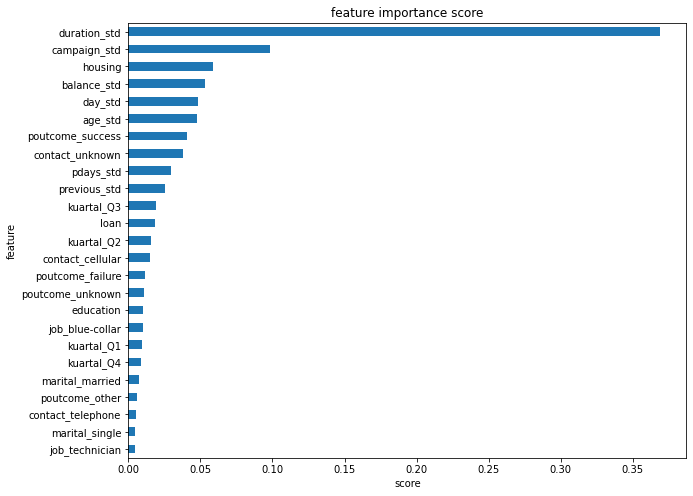

In [ ]:
show_feature_importance(model_under)

In [ ]:
print('Over Sampling')
eval_classification(model_over, xtrain_over, ytrain_over, xtest_over, ytest_over)

Over Sampling
Accuracy (Train Set): 0.90
Accuracy (Test Set): 0.87

Precision (Train Set): 0.89
Precision (Test Set): 0.84

Recall (Train Set): 0.78
Recall (Test Set): 0.76

F1-Score (Train Set): 0.83
F1-Score (Test Set): 0.80

AUC (Train Set): 0.97
AUC (Test Set): 0.95


In [ ]:
print('SMOTE')
eval_classification(model_smote, xtrain_over_SMOTE, ytrain_over_SMOTE, xtest_over_SMOTE, ytest_over_SMOTE)

SMOTE
Accuracy (Train Set): 0.94
Accuracy (Test Set): 0.91

Precision (Train Set): 0.91
Precision (Test Set): 0.86

Recall (Train Set): 0.92
Recall (Test Set): 0.87

F1-Score (Train Set): 0.91
F1-Score (Test Set): 0.86

AUC (Train Set): 0.99
AUC (Test Set): 0.97


# Iterasi 1

# Pre-Processing

Skenario:
*   Hanya menggunakan kolom `duration`, `campaign`, `age`, `balance`, `day`, `housing`, `poutcome`, `previous`, `month`, dan `pdays`
*   Pengelompokan kolom `month` menjadi kolom `kuartal`
*   Melakukan skaling untuk kolom numerikal dengan standardisasi
*   Melakukan label encoding untuk kolom `housing` dan `y`
*   Melakukan OHE untuk kolom `poutcome` dan `kuartal`
*   Melakukan handling imbalance dengan undersampling, oversampling, dan SMOTE



In [5]:
# Read dataset
df_bank_1 = df_bank.copy()
df_bank_1.sample(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
26449,32,blue-collar,married,secondary,no,305,yes,no,cellular,20,nov,73,1,-1,0,unknown,no
36525,27,blue-collar,single,secondary,no,541,yes,no,cellular,12,may,341,1,-1,0,unknown,no
15593,34,admin.,married,secondary,no,-45,yes,no,cellular,21,jul,88,4,-1,0,unknown,no
18775,28,unemployed,married,primary,yes,44,yes,no,cellular,31,jul,6,13,-1,0,unknown,no
25457,37,management,married,tertiary,no,156,no,no,cellular,19,nov,366,3,-1,0,unknown,yes
515,49,entrepreneur,married,secondary,no,167,yes,yes,unknown,6,may,198,3,-1,0,unknown,no
2765,31,blue-collar,married,secondary,no,369,yes,yes,unknown,14,may,89,2,-1,0,unknown,no


In [6]:
df_bank_1 = df_bank_1.drop(columns = ['job', 'marital', 'education', 'default',	'loan', 'contact'])
df_bank_1.sample(7)

,age,balance,housing,day,month,duration,campaign,pdays,previous,poutcome,y
14189,46,830,yes,11,jul,211,2,-1,0,unknown,no
12926,56,58932,no,7,jul,339,2,-1,0,unknown,no
6018,54,1464,yes,26,may,425,4,-1,0,unknown,no
17237,39,293,yes,28,jul,148,2,-1,0,unknown,no
17941,48,63,no,30,jul,29,4,-1,0,unknown,no
27909,37,62,yes,28,jan,252,2,268,2,failure,no
14025,40,149,yes,11,jul,159,1,-1,0,unknown,no


In [7]:
# Grouping kolom month
df_bank_1['kuartal'] = np.where(df_bank_1.month.isin(['jan', 'feb', 'mar']) == True, 'Q1',
                                   np.where(df_bank_1.month.isin(['apr', 'may', 'jun']) == True, 'Q2',
                                            np.where(df_bank_1.month.isin(['jul', 'aug', 'sep']) == True, 'Q3', 'Q4')))
df_bank_1.sample(7)

,age,balance,housing,day,month,duration,campaign,pdays,previous,poutcome,y,kuartal
24978,57,0,no,18,nov,300,1,-1,0,unknown,no,Q4
34911,38,613,yes,6,may,285,2,254,14,other,no,Q2
13594,48,469,no,9,jul,313,1,-1,0,unknown,no,Q3
21363,32,3628,no,18,aug,130,2,-1,0,unknown,no,Q3
4379,42,596,yes,19,may,66,9,-1,0,unknown,no,Q2
22057,49,601,no,20,aug,278,6,-1,0,unknown,no,Q3
4519,38,434,yes,20,may,411,1,-1,0,unknown,no,Q2


In [8]:
# Standardisasi kolom numerikal
from sklearn.preprocessing import StandardScaler

num_col = df_bank_1.select_dtypes('number').columns.tolist()
for i in range(0, len(num_col)):
  df_bank_1[str(num_col[i]) + '_std'] = StandardScaler().fit_transform(df_bank_1[num_col[i]].values.reshape(len(df_bank_1), 1))
  df_bank_1 = df_bank_1.drop(columns = num_col[i])

df_bank_1.sample(7)

,housing,month,poutcome,y,kuartal,age_std,balance_std,day_std,duration_std,campaign_std,pdays_std,previous_std
20306,no,aug,unknown,no,Q3,-0.370689,-0.447419,-0.577529,-0.276335,0.399020,-0.411453,-0.251940
31825,yes,apr,unknown,no,Q2,0.665225,-0.042129,-0.938003,-0.272452,-0.569351,-0.411453,-0.251940
43630,no,may,unknown,yes,Q2,-1.218254,-0.303893,-1.298476,0.310016,-0.569351,-0.411453,-0.251940
43352,no,mar,success,yes,Q1,1.983661,0.659739,1.104681,-0.276335,-0.569351,1.376265,0.616335
13328,no,jul,unknown,no,Q3,-1.500776,-0.373850,-0.938003,-0.936465,0.399020,-0.411453,-0.251940
24494,no,nov,failure,no,Q4,0.571051,-0.421144,0.143418,-0.715127,-0.569351,1.046686,0.182198
25854,no,nov,unknown,no,Q4,-0.653211,1.358322,0.383734,0.026549,-0.569351,-0.411453,-0.251940


In [10]:
# Label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

encoding = ['housing', 'y']

for cols in encoding:
    df_bank_1[cols] = label_encoder.fit_transform(df_bank_1[cols])

df_bank_1.sample(8)

,housing,month,poutcome,y,kuartal,age_std,balance_std,day_std,duration_std,campaign_std,pdays_std,previous_std
28939,1,feb,failure,0,Q1,0.476877,-0.328197,-1.658950,0.341081,-0.569351,1.396240,1.050473
34860,1,may,failure,0,Q2,-0.653211,1.162574,-1.178318,-0.773374,-0.569351,1.266405,0.182198
16157,0,jul,unknown,0,Q3,0.759399,-0.238862,0.744208,0.550770,1.690181,-0.411453,-0.251940
29619,1,feb,unknown,0,Q1,0.665225,3.287228,-1.538792,-0.579218,0.076230,-0.411453,-0.251940
18650,1,jul,unknown,0,Q3,-0.370689,-0.379105,1.825628,0.356614,0.721811,-0.411453,-0.251940
17439,1,jul,unknown,0,Q3,-0.182341,-0.177116,1.465155,2.026355,-0.246560,-0.411453,-0.251940
28261,1,jan,failure,0,Q1,1.136095,0.014033,1.585313,-0.458841,-0.569351,2.035424,0.182198
26583,1,nov,unknown,0,Q4,-0.935732,-0.447419,0.503892,-0.000633,-0.569351,-0.411453,-0.251940


In [11]:
# OHE
# WARNING: run code ini sekali saja
for cat in ['poutcome', 'kuartal']:
    onehots = pd.get_dummies(df_bank_1[cat], prefix=cat)
    df_bank_1 = df_bank_1.join(onehots)

df_bank_1.sample(7)

,housing,month,poutcome,y,kuartal,age_std,balance_std,day_std,duration_std,campaign_std,pdays_std,previous_std,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,kuartal_Q1,kuartal_Q2,kuartal_Q3,kuartal_Q4
29544,1,feb,unknown,0,Q1,0.006007,0.236056,-1.538792,-0.796673,0.076230,-0.411453,-0.251940,0,0,0,1,1,0,0,0
28566,1,jan,failure,0,Q1,0.665225,-0.414247,1.585313,0.605133,-0.246560,1.516087,1.050473,1,0,0,0,1,0,0,0
19016,0,aug,unknown,0,Q3,-0.182341,-0.096321,-1.298476,0.636198,-0.569351,-0.411453,-0.251940,0,0,0,1,0,0,1,0
43273,0,mar,success,0,Q1,3.584618,0.546100,-0.577529,-0.287984,-0.569351,0.497387,2.352887,0,0,1,0,1,0,0,0
9347,1,jun,unknown,0,Q2,-0.088167,-0.268093,-1.178318,-0.152075,-0.569351,-0.411453,-0.251940,0,0,0,1,0,1,0,0
25851,1,nov,unknown,0,Q4,-0.935732,-0.252657,0.383734,0.515822,-0.246560,-0.411453,-0.251940,0,0,0,1,0,0,0,1
7613,1,may,unknown,0,Q2,0.382703,-0.311775,1.705471,-0.750075,-0.569351,-0.411453,-0.251940,0,0,0,1,0,1,0,0


In [12]:
# Drop columns
df_bank_1 = df_bank_1.drop(columns = ['poutcome', 'kuartal', 'month'])
df_bank_1.sample(7)

,housing,y,age_std,balance_std,day_std,duration_std,campaign_std,pdays_std,previous_std,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,kuartal_Q1,kuartal_Q2,kuartal_Q3,kuartal_Q4
1122,1,0,0.006007,-0.362683,-1.058161,-0.023932,-0.569351,-0.411453,-0.251940,0,0,0,1,0,1,0,0
28588,0,0,-0.370689,-0.312761,1.585313,0.306133,-0.246560,-0.411453,-0.251940,0,0,0,1,1,0,0,0
2809,1,0,1.041921,-0.290427,-0.217055,-0.575335,-0.246560,-0.411453,-0.251940,0,0,0,1,0,1,0,0
43634,0,0,-1.406602,-0.302907,-1.298476,-0.792789,-0.569351,-0.411453,-0.251940,0,0,0,1,0,1,0,0
14018,1,0,0.006007,-0.650393,-0.577529,-0.167607,-0.569351,-0.411453,-0.251940,0,0,0,1,0,0,1,0
36920,1,0,1.041921,-0.200435,-0.457371,0.313899,0.399020,3.064111,0.616335,1,0,0,0,0,1,0,0
6679,1,0,-0.559037,0.029798,1.465155,-0.229737,-0.569351,-0.411453,-0.251940,0,0,0,1,0,1,0,0


In [13]:
# Pemisahan features vs target
x = df_bank_1.drop(columns=['y']) # menggunakan semua feature kecuali target
y = df_bank_1['y']
print(x.shape)
print(y.shape)

(45211, 16)
(45211,)


In [14]:
# Handling class imbalance
from imblearn import under_sampling, over_sampling

x_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(x, y)
x_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(x, y)
x_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [15]:
print('Original')
print(pd.Series(y).value_counts())
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    39922
1     5289
Name: y, dtype: int64
UNDERSAMPLING
0    10578
1     5289
Name: y, dtype: int64
OVERSAMPLING
0    39922
1    19961
Name: y, dtype: int64
SMOTE
0    39922
1    19961
Name: y, dtype: int64


# Split Data Train & Test

In [16]:
# Split data train & test
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 1/3, random_state = 50)
xtrain_under, xtest_under, ytrain_under, ytest_under = train_test_split(x_under, y_under, test_size = 1/3, random_state = 50)
xtrain_over, xtest_over, ytrain_over, ytest_over = train_test_split(x_over, y_over, test_size = 1/3, random_state = 50)
xtrain_over_SMOTE, xtest_over_SMOTE, ytrain_over_SMOTE, ytest_over_SMOTE = train_test_split(x_over_SMOTE, y_over_SMOTE, test_size = 1/3, random_state = 50)

# Modeling Random Forest

In [17]:
# Fitting Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 50)
rf_ori = rf.fit(xtrain, ytrain)
rf_under = rf.fit(xtrain_under, ytrain_under)
rf_over = rf.fit(xtrain_over, ytrain_over)
rf_smote = rf.fit(xtrain_over_SMOTE, ytrain_over_SMOTE)

In [20]:
# Random Forest Evaluation
print('Original')
eval_classification(rf_ori, xtrain, ytrain, xtest, ytest)

Original
Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.96

Precision (Train Set): 0.89
Precision (Test Set): 0.78

Recall (Train Set): 0.93
Recall (Test Set): 0.88

F1-Score (Train Set): 0.91
F1-Score (Test Set): 0.83

AUC (Train Set): 0.99
AUC (Test Set): 0.98


In [21]:
print('Under Sampling')
eval_classification(rf_under, xtrain_under, ytrain_under, xtest_under, ytest_under)

Under Sampling
Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.96

Precision (Train Set): 0.95
Precision (Test Set): 0.96

Recall (Train Set): 0.91
Recall (Test Set): 0.92

F1-Score (Train Set): 0.93
F1-Score (Test Set): 0.94

AUC (Train Set): 0.99
AUC (Test Set): 0.99


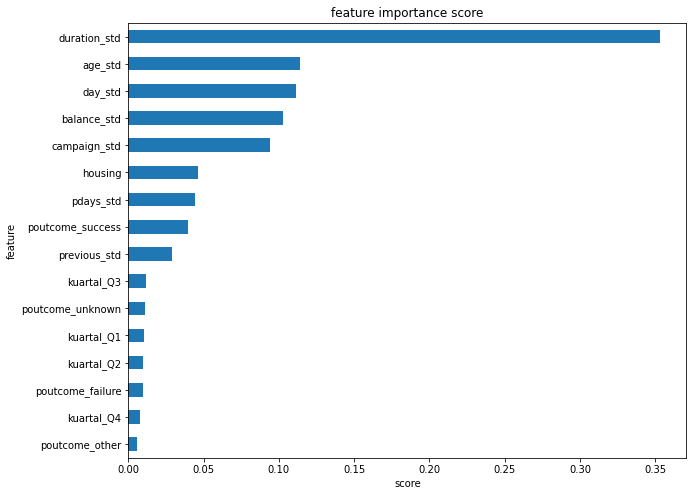

In [22]:
show_feature_importance(rf_under)

In [23]:
print('Over Sampling')
eval_classification(rf_over, xtrain_over, ytrain_over, xtest_over, ytest_over)

Over Sampling
Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.91

Precision (Train Set): 1.00
Precision (Test Set): 0.87

Recall (Train Set): 0.93
Recall (Test Set): 0.86

F1-Score (Train Set): 0.97
F1-Score (Test Set): 0.86

AUC (Train Set): 1.00
AUC (Test Set): 0.96


In [24]:
print('SMOTE')
eval_classification(rf_smote, xtrain_over_SMOTE, ytrain_over_SMOTE, xtest_over_SMOTE, ytest_over_SMOTE)

SMOTE
Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.92

Precision (Train Set): 1.00
Precision (Test Set): 0.87

Recall (Train Set): 1.00
Recall (Test Set): 0.88

F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.88

AUC (Train Set): 1.00
AUC (Test Set): 0.97
